In [49]:
# Import the required library to access Google Drive
from google.colab import drive

# Mount Google Drive to Colab so we can access files stored there
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
file_path = "/content/drive/MyDrive/question4-stock-data.csv"
df= pd.read_csv(file_path)

Data Exploration

In [51]:
df.dtypes


,0
Unnamed: 0,int64
Date,object
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,float64


In [52]:
#drop unamed 0 and convert date column to datetime

import pandas as pd
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Drop 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)


In [53]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0


In [54]:
#checked how many datas for each month with year

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month and count the number of data points
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

monthly_counts


,Year,Month,Count
0,1980.0,3.0,11
1,1980.0,4.0,21
2,1980.0,5.0,21
3,1980.0,6.0,21
4,1980.0,7.0,22
...,...,...,...
533,2024.0,8.0,22
534,2024.0,9.0,20
535,2024.0,10.0,23
536,2024.0,11.0,18


In [55]:
#data counts by year count

import numpy as np

# Group by year and count the number of data points
yearly_counts = df.groupby('Year').size().reset_index(name='Count')

yearly_counts


,Year,Count
0,1980.0,198
1,1981.0,250
2,1982.0,252
3,1983.0,247
4,1984.0,250
5,1985.0,251
6,1986.0,250
7,1987.0,250
8,1988.0,253
9,1989.0,248


In [56]:
#need to split data only for 20 years from last data
# because there were errors in columns and data in the older historical records.

import pandas as pd

# Find the last date in the dataset
last_date = df['Date'].max()

# Calculate the date 20 years before the last date
twenty_years_ago = last_date - pd.DateOffset(years=20)

# Filter the DataFrame to include only data from the last 20 years
df_last_20_years = df[df['Date'] >= twenty_years_ago]

# Now df_last_20_years contains only the data from the last 20 years
df_last_20_years


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month
6255,2004-12-27,61.901367,80.150002,80.330002,79.709999,79.709999,182600.0,2004.0,12.0
6256,2004-12-28,62.055862,80.349998,80.470001,80.019997,80.150002,123500.0,2004.0,12.0
6257,2004-12-29,61.654243,79.830002,NaN,79.540001,80.120003,80200.0,2004.0,12.0
6258,2004-12-30,62.287544,80.650002,80.910004,80.279999,80.449997,96900.0,2004.0,12.0
6259,2004-12-31,63.229782,81.870003,81.870003,80.849998,80.849998,137200.0,2004.0,12.0
...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0,2024.0,12.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,2024.0,12.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,2024.0,12.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,2024.0,12.0


Checking null values

In [57]:
#check for null values for last 20 years data

# Check for null values in the last 20 years of data
null_counts = df_last_20_years.isnull().sum()
null_counts


,0
Date,0
Adj Close,39
Close,51
High,41
Low,56
Open,40
Volume,73
Year,0
Month,0


In [58]:
#remove all null rows from last 20 years data

# Remove rows with any null values
df_cleaned = df_last_20_years.dropna()

df_cleaned


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month
6255,2004-12-27,61.901367,80.150002,80.330002,79.709999,79.709999,182600.0,2004.0,12.0
6256,2004-12-28,62.055862,80.349998,80.470001,80.019997,80.150002,123500.0,2004.0,12.0
6258,2004-12-30,62.287544,80.650002,80.910004,80.279999,80.449997,96900.0,2004.0,12.0
6259,2004-12-31,63.229782,81.870003,81.870003,80.849998,80.849998,137200.0,2004.0,12.0
6260,2005-01-03,62.851334,81.379997,82.269997,81.169998,82.099998,245900.0,2005.0,1.0
...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0,2024.0,12.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,2024.0,12.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,2024.0,12.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,2024.0,12.0


In [59]:
# check for null values aftee the data cleaned

# Check for null values in the cleaned data
null_counts_cleaned = df_cleaned.isnull().sum()
null_counts_cleaned


,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Year,0
Month,0


In [60]:
#check volume ==0 data rows and remove them

# Check for rows where 'Volume' is equal to 0
volume_zero_rows = df_cleaned[df_cleaned['Volume'] == 0]

# Print the rows where 'Volume' is 0
volume_zero_rows


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month


In [61]:
# date , months data count

# Group by year and month and count the number of data points in the cleaned data
monthly_counts_cleaned = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Count')

monthly_counts_cleaned


,Year,Month,Count
0,2004.0,12.0,4
1,2005.0,1.0,17
2,2005.0,2.0,19
3,2005.0,3.0,21
4,2005.0,4.0,20
...,...,...,...
236,2024.0,8.0,20
237,2024.0,9.0,19
238,2024.0,10.0,21
239,2024.0,11.0,18


In [62]:
#check for duplicate rows

# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]

# Print the duplicate rows
duplicate_rows


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month


Visualizations

In [63]:
#line chart denoting all features

import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df_cleaned['Date'],
                open=df_cleaned['Open'],
                high=df_cleaned['High'],
                low=df_cleaned['Low'],
                close=df_cleaned['Close'])])

fig.update_layout(
    title='Stock Price with Date',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()


<ipython-input-64-f57c4c90018d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



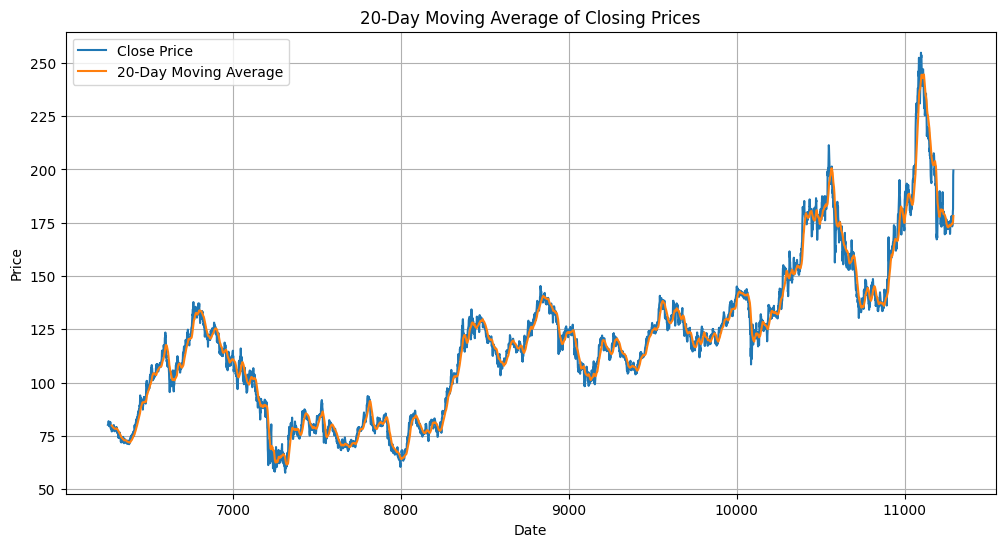

In [64]:
# Moving averages: Calculate rolling means to smooth out noise and identify trends

import matplotlib.pyplot as plt
# Calculate rolling means (moving averages)
window_size = 20  # Adjust the window size as needed
df_cleaned['MA_20'] = df_cleaned['Close'].rolling(window=window_size).mean()

# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Close'], label='Close Price')
plt.plot(df_cleaned['MA_20'], label=f'{window_size}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{window_size}-Day Moving Average of Closing Prices')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
#only the close value and index line chart

# Assuming df_cleaned is your DataFrame as in the previous code
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=df_cleaned.index, y=df_cleaned['Close'])])

fig.update_layout(
    title='Close Price over Time',
    xaxis_title='Date',
    yaxis_title='Close Price'
)

fig.show()


Data Splitting

In [66]:
# Define features (X) and target variable (y)
df_cleaned.set_index('Date', inplace=True)
X = df_cleaned.drop(columns=['Close', 'MA_20', 'Month','Year'])  # Features
y = df_cleaned['Close']  # Target variable

# Compute the split point (80% training, 20% testing)
split_point = int(len(X) * 0.8)

# Train-Test Split (Sequential, without shuffling)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (3763, 5)
X_test shape: (941, 5)
y_train shape: (3763,)
y_test shape: (941,)


In [67]:
X_train

,Adj Close,High,Low,Open,Volume
Date,,,,,
2004-12-27,61.901367,80.330002,79.709999,79.709999,182600.0
2004-12-28,62.055862,80.470001,80.019997,80.150002,123500.0
2004-12-30,62.287544,80.910004,80.279999,80.449997,96900.0
2004-12-31,63.229782,81.870003,80.849998,80.849998,137200.0
2005-01-03,62.851334,82.269997,81.169998,82.099998,245900.0
...,...,...,...,...,...
2020-12-28,152.600006,153.419998,152.229996,153.100006,215600.0
2020-12-29,153.339996,155.199997,152.899994,155.000000,265100.0
2020-12-30,154.089996,155.210007,154.039993,154.509995,193500.0


In [68]:
print(X_train.dtypes)


Adj Close    float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object


##Model Training and Evaluation

In [69]:
#randomforest , XGBoost ,linear regression

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np



# Initialize and train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Example parameters, tune as needed
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, random_state=42) # Example parameters, tune as needed
xgb_model.fit(X_train, y_train)


# Make predictions
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate models (accuracy for classification, RMSE for regression)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print("RandomForest RMSE:", rf_rmse)
print("XGBoost RMSE:", xgb_rmse)



#linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print("Linear Regression RMSE:", lr_rmse)




RandomForest RMSE: 31.04909522792196
XGBoost RMSE: 32.749771643265944
Linear Regression RMSE: 0.6029463971680233


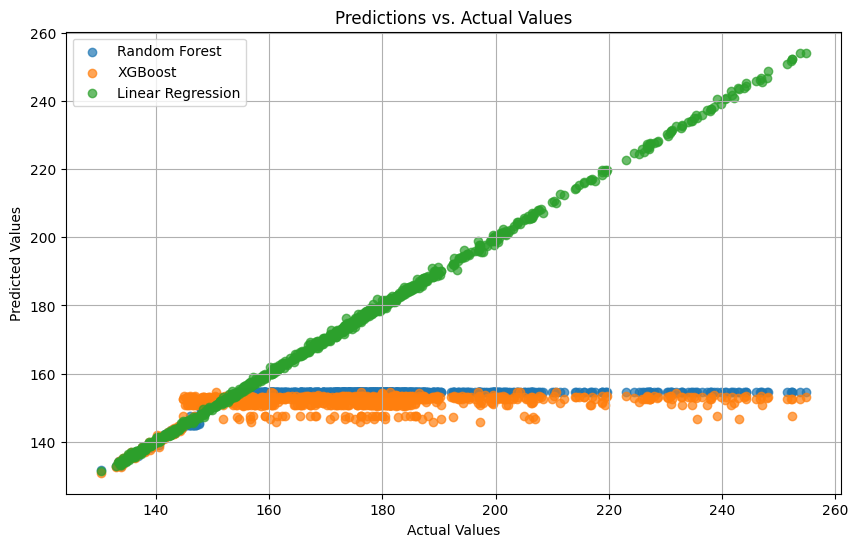

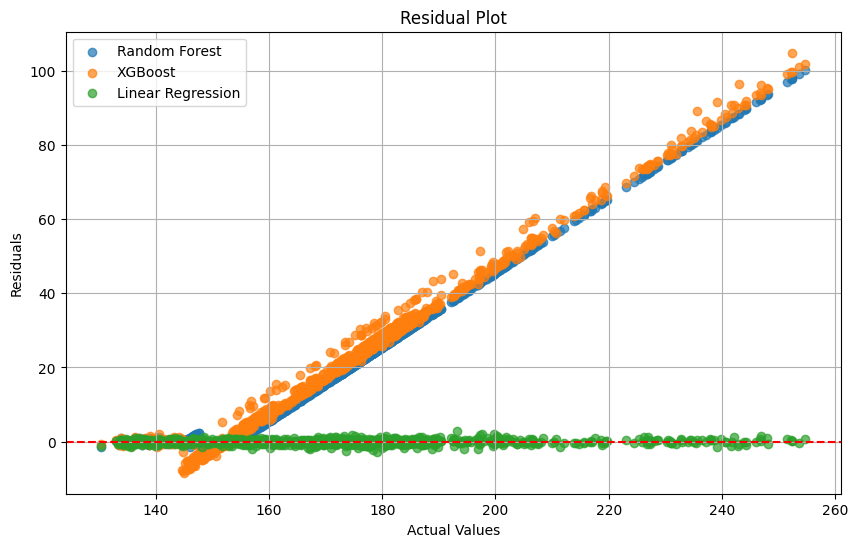

Random Forest R-squared: -0.4120934493075459
XGBoost R-squared: -0.5710213672944848
Linear Regression R-squared: 0.9994674959091102


In [70]:
#plotted Randomforest , XGboost, Linear regression predictions and calcualted the r2score

# Further analysis of predictions vs. actual values
import matplotlib.pyplot as plt

# Create a scatter plot of predictions vs. actual values for each model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, label='Random Forest', alpha=0.7)
plt.scatter(y_test, xgb_predictions, label='XGBoost', alpha=0.7)
plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print other evaluation metrics (example: R-squared)
from sklearn.metrics import r2_score

rf_r2 = r2_score(y_test, rf_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
lr_r2 = r2_score(y_test, lr_predictions)



# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - rf_predictions, label='Random Forest', alpha=0.7)
plt.scatter(y_test, y_test - xgb_predictions, label='XGBoost', alpha=0.7)
plt.scatter(y_test, y_test - lr_predictions, label='Linear Regression', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


print("Random Forest R-squared:", rf_r2)
print("XGBoost R-squared:", xgb_r2)
print("Linear Regression R-squared:", lr_r2)


In [71]:
#KNN Decision tree

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



# Initialize and train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Example parameters, tune as needed
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)
print("KNN RMSE:", knn_rmse)
print("KNN R-squared:", knn_r2)


# Initialize and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)  # Example parameters, tune as needed
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree RMSE:", dt_rmse)
print("Decision Tree R-squared:", dt_r2)


# Add the new model predictions to the predictions DataFrame
predictions_df['KNN'] = knn_predictions
predictions_df['Decision Tree'] = dt_predictions




KNN RMSE: 67.89172586906648
KNN R-squared: -5.751483919688673
Decision Tree RMSE: 30.93865199589815
Decision Tree R-squared: -0.4020655376237543


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1894
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3433e-04
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7028e-04
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1676e-04
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4858e-05
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4034e-05
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9132e-05
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7583e-05
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4630e-05
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2294e-05
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3317e-05
Epoch 13/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9745e-05
Epoch 14/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.4921e-05
Epoch 15/50
118/118 

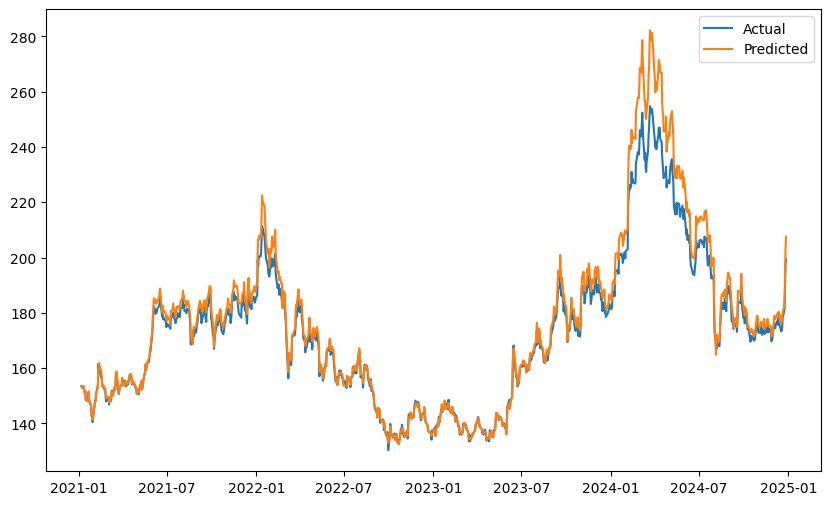

In [72]:
#LSTM

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


# Reshape the data for LSTM input (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, verbose=1) # Adjust epochs and batch size


# Make predictions
lstm_predictions_scaled = model.predict(X_test_reshaped)

# Inverse transform the predictions to the original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)


# Evaluate the model
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print("LSTM RMSE:", lstm_rmse)

lstm_r2 = r2_score(y_test, lstm_predictions)
print("LSTM R-squared:", lstm_r2)

# Further analysis and visualization (similar to previous examples)

#Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label = 'Actual')
plt.plot(y_test.index, lstm_predictions, label = 'Predicted')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA RMSE: 2.8498272058972636
ARIMA R-squared 0.9881039550653333


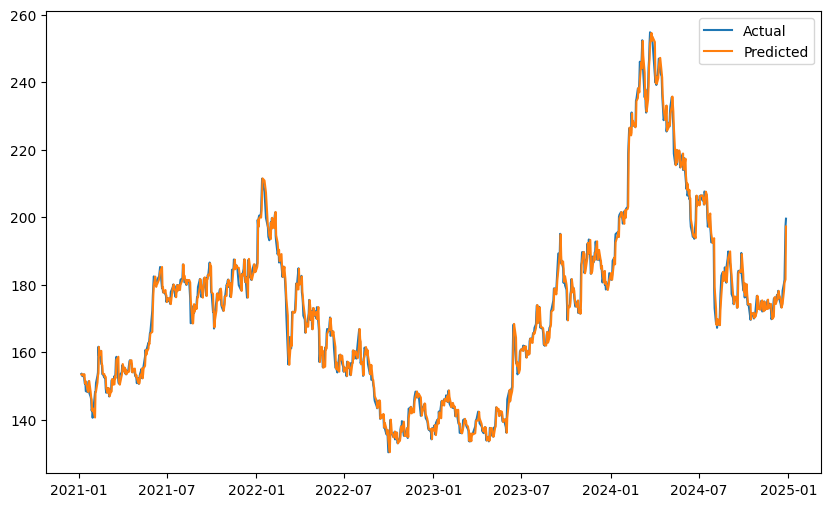

In [73]:
#ARIMA model

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


close_prices = df_cleaned['Close']

model = ARIMA(close_prices, order=(5, 1, 0)) # Replace with your determined (p, d, q)
model_fit = model.fit()


# Make predictions
predictions = model_fit.predict(start=len(close_prices) - len(X_test), end=len(close_prices) - 1)


# Evaluate the model
arima_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("ARIMA RMSE:", arima_rmse)

arima_r2 = r2_score(y_test, predictions)
print('ARIMA R-squared', arima_r2)

#Further analysis:
# Plot predictions vs. actual
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label = 'Actual')
plt.plot(y_test.index, predictions, label = 'Predicted')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA RMSE: 2.8511437560287627
SARIMA R-squared: 0.9881039550653333


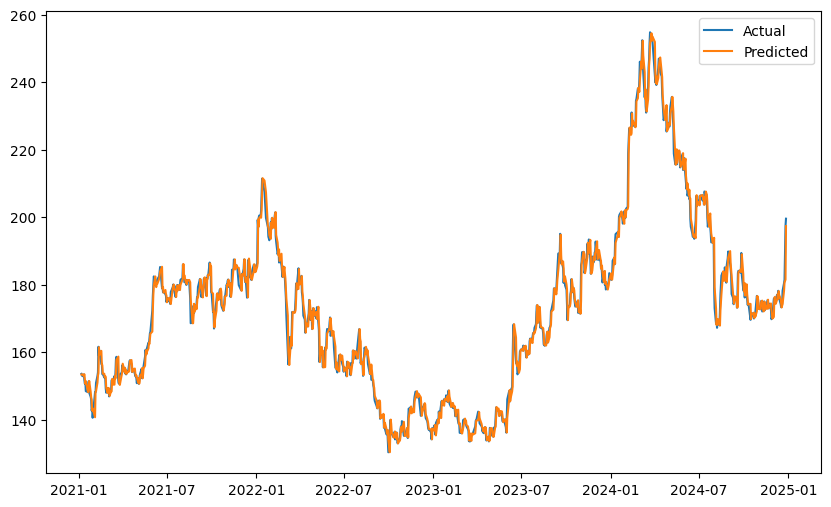

,Actual,SARIMA Predicted
Date,,
2021-01-06,153.529999,153.322012
2021-01-08,152.850006,153.406753
2021-01-11,153.389999,152.922130
2021-01-12,151.750000,153.420315
2021-01-13,150.649994,151.813752
...,...,...
2024-12-20,178.169998,174.242501
2024-12-23,180.449997,178.218883
2024-12-24,181.429993,180.611858


In [74]:
#code for SARIMA MODel

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Fit the SARIMA model
model = SARIMAX(close_prices, order=(5, 1, 0), seasonal_order=(1, 1, 1, 7)) # Replace with your determined orders
model_fit = model.fit()

# Make predictions
SARIMA_predictions = model_fit.predict(start=len(close_prices) - len(X_test), end=len(close_prices) - 1)

# Evaluate the model
sarima_rmse = np.sqrt(mean_squared_error(y_test, SARIMA_predictions))
print("SARIMA RMSE:", sarima_rmse)

sarima_r2 = r2_score(y_test, predictions)
print("SARIMA R-squared:", sarima_r2)

#Further analysis:
# Plot predictions vs. actual
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, SARIMA_predictions, label='Predicted')
plt.legend()
plt.show()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'SARIMA Predicted': SARIMA_predictions})

# Display the DataFrame
comparison_df


SVR RMSE: 72.11894230810319
SVR R-squared: -6.618408172321644


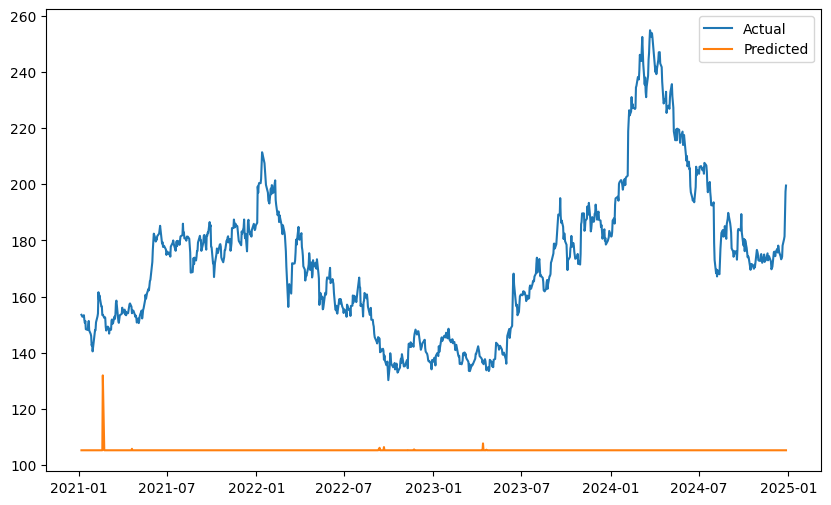

In [75]:
#SVM model

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR


# Initialize the Support Vector Regressor model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # Example parameters, tune as needed

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
svr_r2 = r2_score(y_test, svr_predictions)

print("SVR RMSE:", svr_rmse)
print("SVR R-squared:", svr_r2)

#Further analysis:
# Plot predictions vs. actual
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label = 'Actual')
plt.plot(y_test.index, svr_predictions, label = 'Predicted')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4951e-04 - val_loss: 0.0011
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4217e-04 - val_loss: 0.0015
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1613e-04 - val_loss: 9.9097e-04
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3655e-04 - val_loss: 0.0011
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0011e-04 - val_loss: 0.0024
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.3645e-04 - val_loss: 0.0010
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2361e-04 - val_loss: 0.0016
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0634e-04 - val_loss: 9.8890e-04
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2108e-04 - val_loss: 9.9060e-04
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0718e-04 - val_loss: 0.0013
Epoch 12/50

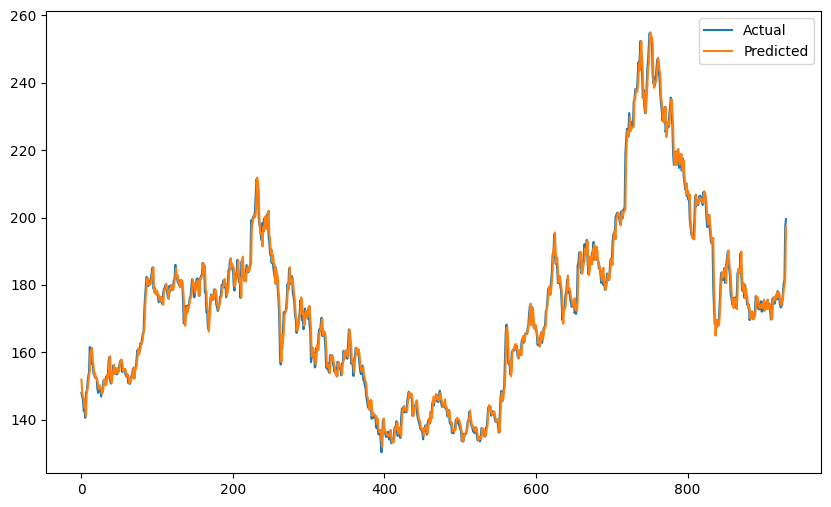

In [76]:
#RNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping



# Prepare the RNN data function
def prepare_rnn_data(X, y, timesteps):
    X_rnn = []
    y_rnn = []
    for i in range(timesteps, len(X)):
        X_rnn.append(X[i-timesteps:i])
        y_rnn.append(y[i])
    return np.array(X_rnn), np.array(y_rnn)

# Reshape the data
timesteps = 10  # Example: Use 10 past days to predict the next day
X_train_rnn, y_train_rnn = prepare_rnn_data(X_train_scaled, y_train_scaled, timesteps)
X_test_rnn, y_test_rnn = prepare_rnn_data(X_test_scaled, y_test_scaled, timesteps)

# Build the RNN model with adjusted number of units (e.g., 100)
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='relu', return_sequences=False, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))  # Adjusted units to 100
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation data and early stopping
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=32, verbose=1,
              validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Make predictions
rnn_predictions_scaled = rnn_model.predict(X_test_rnn)
rnn_predictions = scaler.inverse_transform(rnn_predictions_scaled)

# Evaluate the model
rnn_rmse = np.sqrt(mean_squared_error(y_test[timesteps:], rnn_predictions))
print("RNN RMSE:", rnn_rmse)

rnn_r2 = r2_score(y_test[timesteps:], rnn_predictions)
print("RNN R-squared:", rnn_r2)

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test[timesteps:])), y_test[timesteps:], label='Actual')
plt.plot(range(len(rnn_predictions)), rnn_predictions, label='Predicted')
plt.legend()
plt.show()


In [77]:
#check the actual values with  predictions of linear regression

import pandas as pd
# Assuming X_test, y_test, and lr_predictions are already defined as in your code.

# Create a DataFrame for better visualization
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions})

# Display the first few rows of the DataFrame
print(results_df.tail(20)) # Display the first 20 rows


                Actual   Predicted
Date                              
2024-11-29  170.630005  170.177920
2024-12-02  175.809998  175.425111
2024-12-03  176.000000  175.944295
2024-12-04  174.779999  174.830960
2024-12-05  174.399994  175.189811
2024-12-06  175.949997  175.748099
2024-12-09  177.009995  178.019390
2024-12-10  175.710007  176.084678
2024-12-11  178.149994  177.611277
2024-12-12  176.899994  177.646380
2024-12-13  175.860001  175.445553
2024-12-16  174.250000  174.369155
2024-12-17  173.279999  173.983843
2024-12-18  173.619995  176.259153
2024-12-19  174.210007  174.825983
2024-12-20  178.169998  179.055227
2024-12-23  180.449997  179.488119
2024-12-24  181.429993  181.432158
2024-12-26  197.360001  195.595681
2024-12-27  199.520004  199.329156


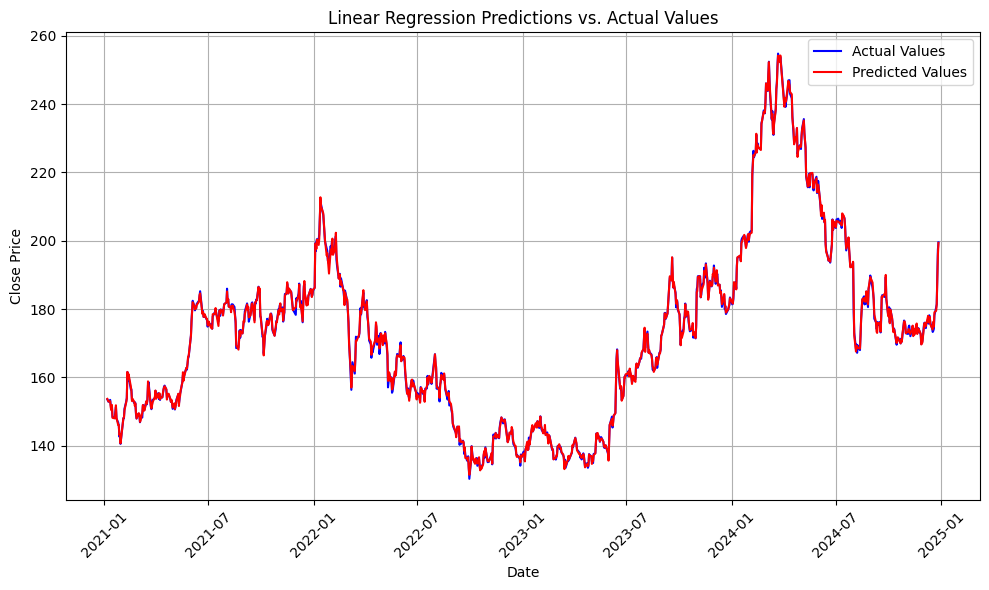

In [78]:
#plot it linear regression predictions and y_test line graph

# Assuming X_test, y_test, and lr_predictions are already defined as in your code.

import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Values', color='blue')
plt.plot(y_test.index, lr_predictions, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [79]:
# LSTM predicted values and y_test values compare table

import pandas as pd
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'LSTM Predicted': lstm_predictions.flatten()})

# Display the DataFrame
comparison_df


,Actual,LSTM Predicted
Date,,
2021-01-06,153.529999,153.273865
2021-01-08,152.850006,153.486618
2021-01-11,153.389999,153.235657
2021-01-12,151.750000,151.932739
2021-01-13,150.649994,150.769623
...,...,...
2024-12-20,178.169998,179.871826
2024-12-23,180.449997,182.281708
2024-12-24,181.429993,184.389938


In [80]:
#ARIMA predictions y_test table

import pandas as pd
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'ARIMA Predicted': predictions})

# Display the DataFrame
comparison_df


,Actual,ARIMA Predicted
Date,,
2021-01-06,153.529999,153.298942
2021-01-08,152.850006,153.473789
2021-01-11,153.389999,152.840392
2021-01-12,151.750000,153.405414
2021-01-13,150.649994,151.758219
...,...,...
2024-12-20,178.169998,174.294745
2024-12-23,180.449997,178.269532
2024-12-24,181.429993,180.590364


In [81]:
#RNN predictions with y_test table

import pandas as pd
import matplotlib.pyplot as plt
# Assuming rnn_predictions and y_test are already defined from the RNN model

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test[timesteps:], 'RNN Predicted': rnn_predictions.flatten()})

# Display the DataFrame
print(comparison_df)

                Actual  RNN Predicted
Date                                 
2021-01-22  147.949997     151.878311
2021-01-25  146.720001     148.149902
2021-01-26  145.979996     146.639893
2021-01-27  142.639999     146.395660
2021-01-28  143.300003     143.650742
...                ...            ...
2024-12-20  178.169998     175.618393
2024-12-23  180.449997     178.501404
2024-12-24  181.429993     179.643417
2024-12-26  197.360001     181.578659
2024-12-27  199.520004     197.321167

[931 rows x 2 columns]


In [82]:
# zoomable plot for the predictions of Random Forest, XGBoost, Linear Regression and y_test

import plotly.graph_objects as go
import pandas as pd

# Assuming y_test, rf_predictions, xgb_predictions, lr_predictions, lstm_predictions, arima_predictions, prophet_predictions, svr_predictions, rnn_predictions are available

# Create a DataFrame for easier plotting with model names
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'Linear Regression': lr_predictions,

})


# Create the zoomable plot using Plotly
fig = go.Figure()

# Add traces for each model's predictions and actual values
for column in predictions_df.columns:
    if column != 'Date':
      fig.add_trace(go.Scatter(x=predictions_df['Date'], y=predictions_df[column], mode='lines', name=column))

fig.update_layout(
    title='Model Predictions vs. Actual Values',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode="x unified",  # Improved hover behavior
)

fig.show()


In [83]:
#plot for RNN,LSTM,ARIMA

import pandas as pd
import numpy as np
import plotly.graph_objects as go


# Create a DataFrame for easier plotting with model names
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'Linear Regression': lr_predictions,
    'LSTM': lstm_predictions.flatten(),  # Flatten LSTM predictions if needed
    'ARIMA': predictions
})

# Ensure all prediction arrays are the same length as y_test
min_len = len(y_test)
for col in ['Random Forest', 'XGBoost', 'Linear Regression', 'LSTM', 'ARIMA']:
  if len(predictions_df[col]) > min_len:
    predictions_df[col] = predictions_df[col][:min_len]

# Create the zoomable plot using Plotly
fig = go.Figure()

# Add traces for each model's predictions and actual values
for column in predictions_df.columns:
    if column != 'Date':
        fig.add_trace(go.Scatter(x=predictions_df['Date'], y=predictions_df[column], mode='lines', name=column))

fig.update_layout(
    title='Model Predictions vs. Actual Values',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode="x unified",  # Improved hover behavior
)

fig.show()


In [84]:
#CSV file with predictions for the test period.  not created the predictiondf predictions_df is not already created as in the previous code

import pandas as pd

# Create a DataFrame for easier plotting with model names
predictions_df = pd.DataFrame({
    'Date': y_test.index,
    'Actual': y_test.values,
    'Random Forest': rf_predictions,
    'XGBoost': xgb_predictions,
    'Linear Regression': lr_predictions,
    'LSTM': lstm_predictions.flatten(),  # Flatten LSTM predictions if needed
    'ARIMA': predictions
})

# Ensure all prediction arrays are the same length as y_test
min_len = len(y_test)
for col in ['Random Forest', 'XGBoost', 'Linear Regression', 'LSTM', 'ARIMA']:
  if len(predictions_df[col]) > min_len:
    predictions_df[col] = predictions_df[col][:min_len]

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

from google.colab import files
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>